Training Data Shape: (404, 13)
Testing Data Shape: (102, 13)
Epoch 1/100


c:\Users\Om Kalamkar\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 558.7604 - mae: 21.7217 - val_loss: 601.0635 - val_mae: 22.6497
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 534.4681 - mae: 21.0655 - val_loss: 551.4084 - val_mae: 21.4713
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 488.5068 - mae: 19.8379 - val_loss: 490.7912 - val_mae: 20.0096
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 403.3141 - mae: 17.6238 - val_loss: 413.5003 - val_mae: 17.9878
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 348.1851 - mae: 16.0570 - val_loss: 318.3830 - val_mae: 15.3870
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 229.8689 - mae: 12.6241 - val_loss: 222.0393 - val_mae: 12.3024
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 147.6508 - mae: 9.8905 - val_loss: 141.6748 - val_mae: 9.2506
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 99.0877 - mae: 7.8036 - val_loss: 95.2501 - val_mae: 7.4760
Epoch 9/100
11/11 ━━━━━━━━━━━━━━━

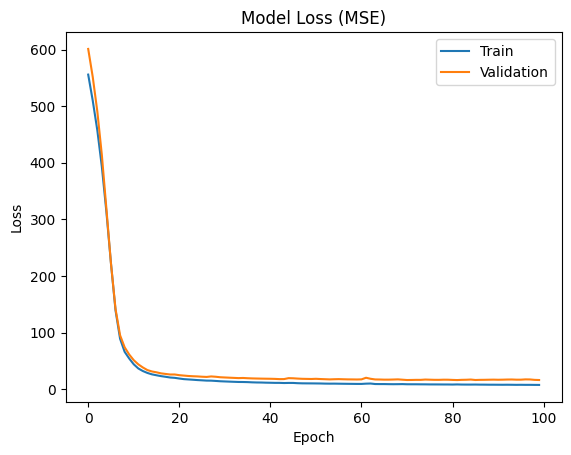

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Predicted Price: 8.57, Actual Price: 7.2
Predicted Price: 18.09, Actual Price: 18.8
Predicted Price: 21.23, Actual Price: 19.0
Predicted Price: 32.66, Actual Price: 27.0
Predicted Price: 25.17, Actual Price: 22.2


In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load Boston Housing dataset from keras datasets
from tensorflow.keras.datasets import boston_housing

# Load the data
(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

print(f"Training Data Shape: {X_train.shape}")
print(f"Testing Data Shape: {X_test.shape}")

# Standardizing features (important for Neural Networks)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Building the model
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)  # Single neuron output (because it's regression)
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate on Test Set
test_loss, test_mae = model.evaluate(X_test_scaled, y_test, verbose=2)

print(f"Test Loss (MSE): {test_loss:.2f}")
print(f"Test MAE: {test_mae:.2f}")

import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss (MSE)')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# Make predictions
predictions = model.predict(X_test_scaled)

# Display first 5 predictions vs actual prices
for i in range(5):
    print(f"Predicted Price: {predictions[i][0]:.2f}, Actual Price: {y_test[i]}")

